## License Information
---

This file is distributed as part of `hvsrpy`, a Python package for horizontal-to-vertical spectral ratio processing.

    Copyright (C) 2019-2021 Joseph P. Vantassel (jvantassel@utexas.edu)

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https: //www.gnu.org/licenses/>.
    
## About _hvsrpy_ and this notebook
---

`hvsrpy` is a Python package for performing horizontal-to-vertical spectral ratio
(HVSR) processing. `hvsrpy` was developed by Joseph P. Vantassel with
contributions from Dana M. Brannon under the supervision of Professor Brady R.
Cox at The University of Texas at Austin.

If you use _hvsrpy_ in your research or consulting, we ask you please cite the following:

>Joseph Vantassel. (2020). jpvantassel/hvsrpy: latest (Concept). Zenodo.
[http://doi.org/10.5281/zenodo.3666956](http://doi.org/10.5281/zenodo.3666956)

_Note: For software, version specific citations should be preferred to
general concept citations, such as that listed above. To generate a version
specific citation for `hvsrpy`, please use the citation tool on the `hvsrpy`
[archive](http://doi.org/10.5281/zenodo.3666956)._

The automated frequency-domain window-rejection algorithm and lognormal statistics
implemented in `hvsrpy` were developed by Tianjian Cheng under the supervision of
Professor Brady R. Cox at The University of Texas at Austin. To
recognize their original work please cite the follwing:

> Cox, B. R., Cheng, T., Vantassel, J. P., & Manuel, L. (2020). "A statistical
> representation and frequency-domain window-rejection algorithm for single-station
> HVSR measurements. Geophysical Journal International, 221(3), 2170–2183.
> https://doi.org/10.1093/gji/ggaa119


This notebook also provides automatic checking of the SESAME (2004) reliability
and clarity critera. To recognize their original work please also cite the following:

> SESAME. (2004). Guidelines for the Implementation of the H/V Spectral Ratio Technique on Ambient Vibrations
> Measurements, Processing, and Interpretation. European Commission - Research General Directorate, 62,
> European Commission - Research General Directorate.

## Getting Started
---
1. Install _hvsrpy_ and its dependencies, with `pip install hvsrpy`. If you are not familiar with `pip`, a useful tutorial can be found [here](https://jpvantassel.github.io/python3-course/#/intro/pip). __(~3 minutes)__
2. Try analyzing the four provided examples. The names of these files have been written and commented out in the section _Time Domain Settings_ for your convenience. __(~15 minutes)__
3. Try one of your own _miniseed_ files and confirm that, when the same settings are used, the result from _hvsrpy_ exactly matches that of Geopsy. If you get an error related to the _miniseed_ file this likely means it does not conform to the _SEED_ standard (refer to the [hvsrpy documentation](https://hvsrpy.readthedocs.io/en/stable/) for details). __(~15 minutes)__

Happy Processing!

In [83]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import hvsrpy
from hvsrpy import utils
from obspy import read

from pathlib import Path
import os

In [8]:
# from obspy import read
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt

#client = Client("IRIS")
#net = "Z9"  # network of the station
#sta = "E27"  # station code
## sta = "E18"  # station code
#loc = "**"  # to specify the instrument at the station
#chan = "BH*"

#starttime = UTCDateTime("2012-09-01T00:00:00")
#endtime = starttime + 60 * 60 * 24  # 24 hours
## endtime = starttime + 60 * 60  # 24 hours

#st = client.get_waveforms(network=net, station=sta, location=loc, channel=chan, starttime=starttime, endtime=endtime, 
                        #   attach_response=True
                          
#print(st)


client = Client ("IRIS")
minlatitude = 28.5
maxlatitude = 36.5

minlongitude =  -87
maxlongitude =  -79

net = "Z9"
sta = "**"
loc = "**"
chan = "BH*"
client = Client("IRIS")
starttime = UTCDateTime("2012-10-01")
endtime = UTCDateTime("2012-10-02")



clt = client.get_stations(network="Z9", station="**",
                                starttime=starttime,minlatitude=minlatitude, maxlatitude=maxlatitude,
                                minlongitude=minlongitude, maxlongitude=maxlongitude,
                                endtime=endtime)

print (clt)

#st.plot(projection="local",label=False,color_per_network=True) 


# # Remove instrument response
# sr = st[0].stats.sampling_rate
# st.remove_response(output='ACC', zero_mean=True, taper=True, taper_fraction=0.05, pre_filt=[0.001, 0.005, sr/3, sr/2], water_level=600)

# Save waveform
#st.write("Apriltoday.mseed", format="MSEED")

#st.plot()

Inventory created at 2024-04-01T21:19:53.532300Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2012-10-01...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			Z9
		Stations (85):
			Z9.D02 (Pollard Property, Appling, GA)
			Z9.D03 (Mistletoe State Park, Appling, GA)
			Z9.D04 (Amason Farm, Lincolnton, GA)
			Z9.D05 (Bedrock Farms, Lincolnton, GA)
			Z9.D06 (Smith Farm, Washington, GA)
			Z9.D07 (Ogden Property, Tignall, GA)
			Z9.D08 (Adams Farm, Fortsonia, GA)
			Z9.D09 (Scarborough Farm, Elberton, GA)
			Z9.D10 (Paul Property, Elberton, GA)
			Z9.D11 (Parham Farm, Dewey Rose, GA)
			Z9.D12 (Alewine Property, Royston, GA)
			Z9.D13 (Victoria Bryant State Park, Royston, GA)
			Z9.D14 (Burroughs Farm, Carnesville, GA)
			Z9.D15 (Vandiver Farm, Carnesville, GA)
			Z9.D17 (Lovell Property, Clarkesville, GA)
			Z9.D18 (Kastner Property, Clarkesville, GA)
			Z9.D19 (Edge Property, Hiawasse

In [45]:
Ndays = 1


client = Client("IRIS")
#t1 = (station.creation_date + 1*365*24*60*60).strftime('%Y-%m-%d')
#t2 = (station.creation_date + 1*365*24*60*60 + Ndays*24*60*60).strftime('%Y-%m-%d')
net = "Z9"
sta = "**"
loc = "**"
chan = "BH?"
#t1 = UTCDateTime ("2012-10-01")
#t2 = UTCDateTime ("2012-10-02")

#starttime  = UTCDateTime("2012-02-27T00:00:00.000")
#endtime = starttime +60 *60 *24

#if st:
   
for network in clt:
    for station in network:
        # Compute HVSR for each station
        
        starttime =  UTCDateTime((station.creation_date + 1*365*24*60*60).strftime('%Y-%m-%d'))
        endtime =  UTCDateTime((station.creation_date + 1*365*24*60*60 + Ndays*24*60*60).strftime('%Y-%m-%d'))
        
        sta = station.code
        #loc = '--'
        net = network.code
        print (sta)

        try:
            st = client.get_waveforms(network= net , station= sta, location= loc, channel= chan, starttime= starttime, endtime= endtime) #attach_response=True)    
        except:
            print('Error downloading data... try subtracting 6 months from start/end time')
            st = client.get_waveforms(network= net , station= sta, location= loc, channel= chan, starttime= starttime-60*60*24*30*6, endtime= endtime-60*60*24*30*6) #attach_response=True)
        
        st.write (net+'.'+sta+'.'+starttime.strftime('%Y-%m-%d')+'.'+endtime.strftime('%Y-%m-%d')+".mseed", format ="MSEED")
            
print (st)






D02
D03
D04
D05
D06
D07
D08
D09
D10
D11
D12
D13
D14
D15
Error downloading data... try subtracting 6 months from start/end time
D17
D18
Error downloading data... try subtracting 6 months from start/end time
D19
Error downloading data... try subtracting 6 months from start/end time
D20
Error downloading data... try subtracting 6 months from start/end time
D21
D22
E01
E02
E03
E04
E05
Error downloading data... try subtracting 6 months from start/end time
E06
E07
E08
E09
E10
E11
E12
E13
E15
E16
E17
E18
E19
E20
E21
E22
E23
E24
E25
E26
E27
E28
E29
E30
E31
W01
W02
W03
W04
W05
W06
W07
W08
W09
W10
W11
W12
W13
W14
W15A
W16
W17
W18
W19
W20
W21
W22
W23
W24
W26
W27
W28
W29
W30
W31
W315
W32
W33
W34
W35
3 Trace(s) in Stream:
Z9.W35..BHE | 2012-05-16T00:00:00.000000Z - 2012-05-17T00:00:00.000000Z | 50.0 Hz, 4320001 samples
Z9.W35..BHN | 2012-05-16T00:00:00.000000Z - 2012-05-17T00:00:00.000000Z | 50.0 Hz, 4320001 samples
Z9.W35..BHZ | 2012-05-16T00:00:00.000000Z - 2012-05-17T00:00:00.000000Z | 50.0 Hz, 

## Time Domain Settings
---

In [85]:
# Input file name (may be a relative or full path).

# file_name = "UT.STN11.A2_C50.miniseed"
# file_name = "UT.STN11.A2_C150.miniseed"
# file_name = "UT.STN12.A2_C50.miniseed"
# file_name = "UT.STN12.A2_C150.miniseed"
#file_name= "april.mseed"
file_path = "/Users/birotimi/Desktop/PHD/HVSR-project/HVSR-master/hvsrpy/sesameapril/"
#file_name= "/Users/birotimi/Desktop/PHD/HVSR-project/HVSR-master/hvsrpy/SESAMEAPRIL.mseed"
# Window length in seconds. In general low frequency peaks require longer window lengths.
# See the SESAME guidelines for specific window length recommendations.
# windowlength = 60 # Default value
    
windowlength = 60

# Boolean to control whether Butterworth filter is applied. 
# Geopsy does not apply a bandpass filter.

filter_bool = False        

# Low-cut frequency for bandpass filter.

filter_flow = 0.1                

# High-cut frequency for bandpass filter.
filter_fhigh = 30                   
# Filter order.
filter_order = 5

# Width of cosine taper {0. - 1.}. Geopsy default of 0.05 is equal to 0.1 -> 0.1 is recommended
width = 0.1

In [86]:
filenames

'/Users/birotimi/Desktop/PHD/HVSR-project/HVSR-master/hvsrpy/sesameapril/Z9.D03.2013-05-04.2013-05-05.mseed'

## Frequency Domain Settings
---

In [87]:
# Konno and Ohmachi smoothing constant. 40 is recommended.
bandwidth = 40

# Minimum frequency after resampling
resample_fmin = 0.1  # Default value
# Maximum frequency after resampling
# resample_fmax = 50  # Default value
# resample_fmax = sr/2
# Number of frequencies after resampling
resample_fnum = 200
# Type of resampling {'log', 'linear'}
resample_type = 'log'

# Upper and lower frequency limits to restrict peak selection. To use the entire range use `None`.
peak_f_lower = None
peak_f_upper = None

## HVSR Settings
---

In [88]:
# Method for combining horizontal components {"squared-average", "geometric-mean", "single-azimuth"}.
# Geopsy's default is "squared-average" -> "geometric-mean" is recommended.
method = "geometric-mean"
# If method="single-azimuth", set azimuth in degree clock-wise from north. If method!="single-azimuth", value is ignored.
azimuth = 0

# Boolean to control whether frequency domain rejection proposed by Cox et al. (2020) is applied.
# Geopsy does not offer this functionality.
rejection_bool = True
# Number of standard deviations to consider during rejection. Smaller values will reject more windows -> 2 is recommended.
n = 2
# Maximum number of iterations to perform for rejection -> 50 is recommended.
max_iterations = 50

# Distribution of f0 {"lognormal", "normal"}. Geopsy default "normal" -> "lognormal" is recommended.
distribution_f0 = "lognormal"
# Distribution of mean curve {"lognormal", "normal"}. Geopsy default "lognormal" -> "lognormal" is recommended.
distribution_mc = "lognormal"

## Plot Settings
---

In [89]:
# Manually set the ylimits of the HVSR figures. Default is None so limits will be set automatically.
ymin, ymax = 0, 10

In [69]:
from pathlib import Path
file_path = "/Users/birotimi/Desktop/PHD/HVSR-project/HVSR-master/hvsrpy/sesameapril/"
file_name = file_path+"Z9.D03.2013-05-04.2013-05-05.mseed"

pathlist = Path(file_path).glob('**/*.mseed')
for path in pathlist:
    print(path)

/Users/birotimi/Desktop/PHD/HVSR-project/HVSR-master/hvsrpy/sesameapril/Z9.E13.2013-05-10.2013-05-11.mseed
/Users/birotimi/Desktop/PHD/HVSR-project/HVSR-master/hvsrpy/sesameapril/Z9.W07.2012-05-11.2012-05-12.mseed
/Users/birotimi/Desktop/PHD/HVSR-project/HVSR-master/hvsrpy/sesameapril/Z9.D04.2013-05-15.2013-05-16.mseed
/Users/birotimi/Desktop/PHD/HVSR-project/HVSR-master/hvsrpy/sesameapril/Z9.W23.2011-07-19.2011-07-20.mseed
/Users/birotimi/Desktop/PHD/HVSR-project/HVSR-master/hvsrpy/sesameapril/Z9.D12.2013-05-03.2013-05-04.mseed
/Users/birotimi/Desktop/PHD/HVSR-project/HVSR-master/hvsrpy/sesameapril/Z9.D03.2013-05-04.2013-05-05.mseed
/Users/birotimi/Desktop/PHD/HVSR-project/HVSR-master/hvsrpy/sesameapril/Z9.E23.2013-05-06.2013-05-07.mseed
/Users/birotimi/Desktop/PHD/HVSR-project/HVSR-master/hvsrpy/sesameapril/Z9.W26.2012-05-16.2012-05-17.mseed
/Users/birotimi/Desktop/PHD/HVSR-project/HVSR-master/hvsrpy/sesameapril/Z9.E05.2013-09-15.2013-09-16.mseed
/Users/birotimi/Desktop/PHD/HVSR-proj

## Perform Calculation
---

Working on: Z9.E13.2013-05-10.2013-05-11
Elapsed Time: 0.77 seconds

Statistics before rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              0.67                          0.89
Fundamental Site Period, T0                 1.48                          0.89


Analysis summary:


Window length                                    60s
No. of windows                                  1440
Number of iterations to convergence  7 of 50 allowed
No. of rejected windows                          553


Statistics after rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              0.91                          0.08
Fundamental Site Period, T0                 1.10                          0.08

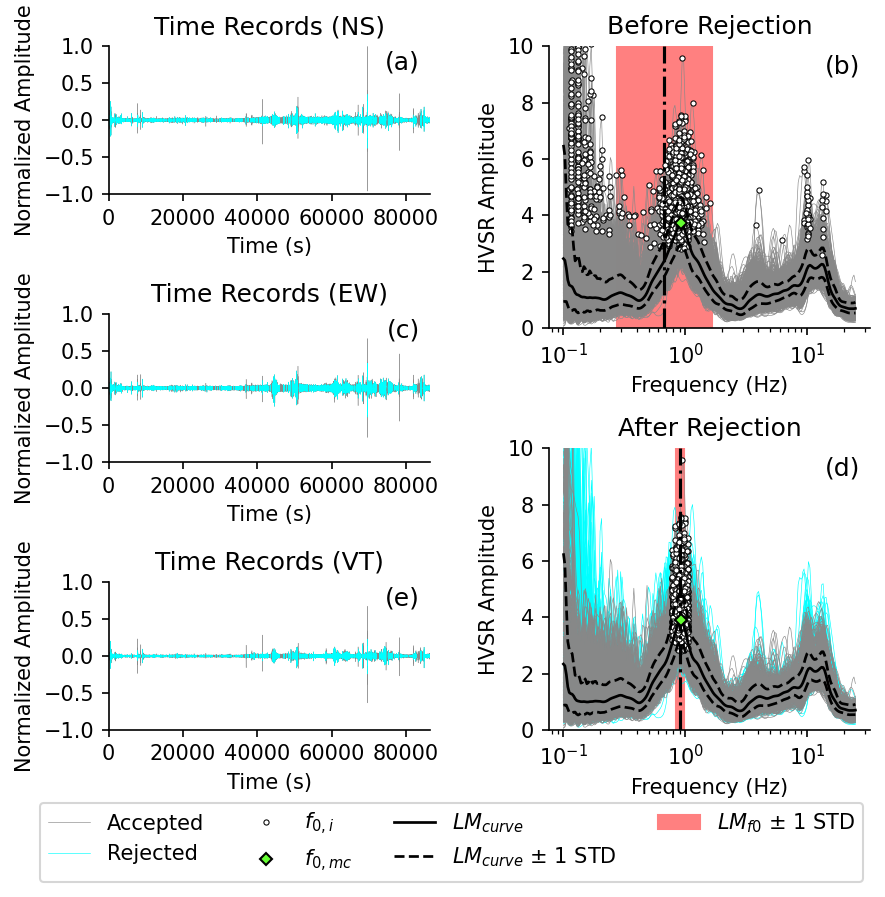

Figure saved successfully!
Results saved successfully!
Results saved successfully!
Working on: Z9.W07.2012-05-11.2012-05-12
Elapsed Time: 0.82 seconds

Statistics before rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              0.28                          1.21
Fundamental Site Period, T0                 3.62                          1.21


Analysis summary:


Window length                                    60s
No. of windows                                  1440
Number of iterations to convergence  5 of 50 allowed
No. of rejected windows                          344


Statistics after rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              0.15                          0.16
Fundamental Site Period, T0                 6.52                          0.16

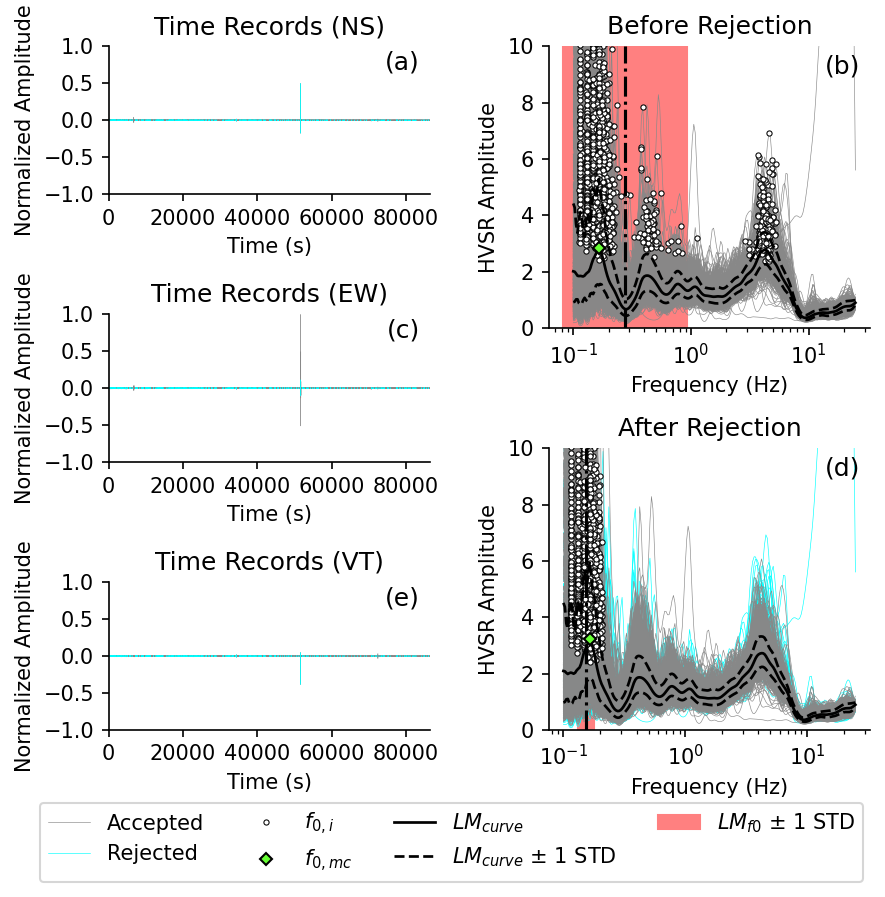

Figure saved successfully!
Results saved successfully!
Results saved successfully!
Working on: Z9.D04.2013-05-15.2013-05-16
Elapsed Time: 0.87 seconds

Statistics before rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              5.17                          1.01
Fundamental Site Period, T0                 0.19                          1.01


Analysis summary:


Window length                                    60s
No. of windows                                  1440
Number of iterations to convergence  4 of 50 allowed
No. of rejected windows                          122


Statistics after rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              6.75                          0.14
Fundamental Site Period, T0                 0.15                          0.14

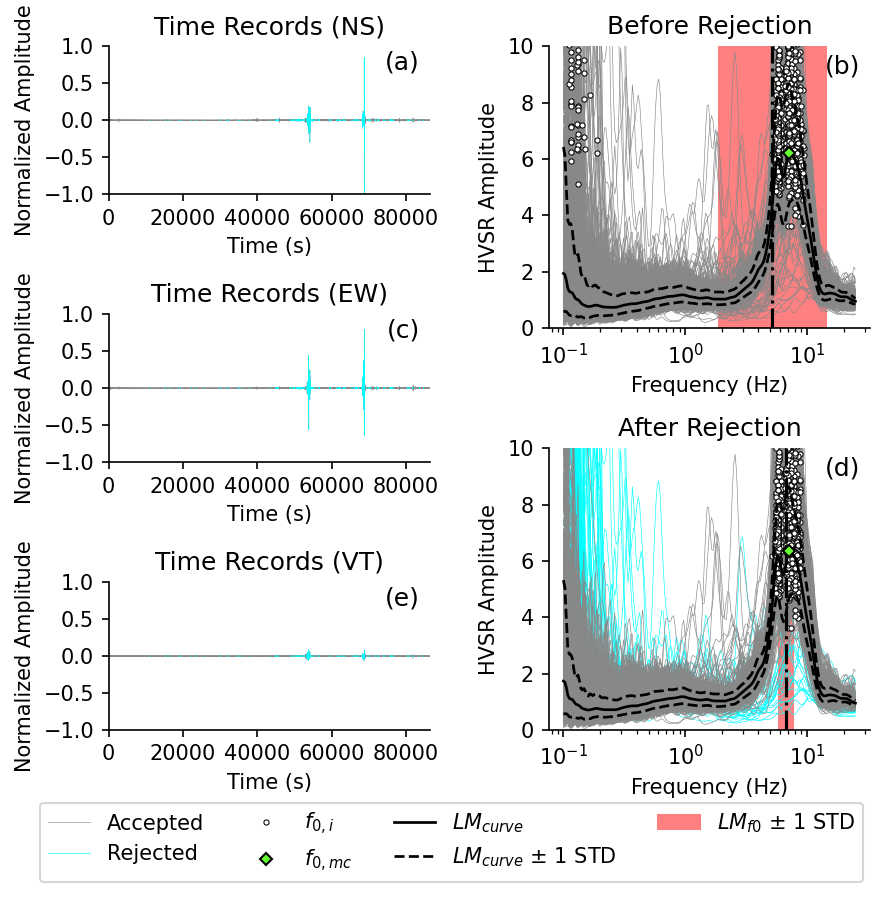

Figure saved successfully!
Results saved successfully!
Results saved successfully!
Working on: Z9.W23.2011-07-19.2011-07-20
Elapsed Time: 0.82 seconds

Statistics before rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              0.55                          0.37
Fundamental Site Period, T0                 1.83                          0.37


Analysis summary:


Window length                                    60s
No. of windows                                  1440
Number of iterations to convergence  6 of 50 allowed
No. of rejected windows                          347


Statistics after rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              0.55                          0.08
Fundamental Site Period, T0                 1.81                          0.08

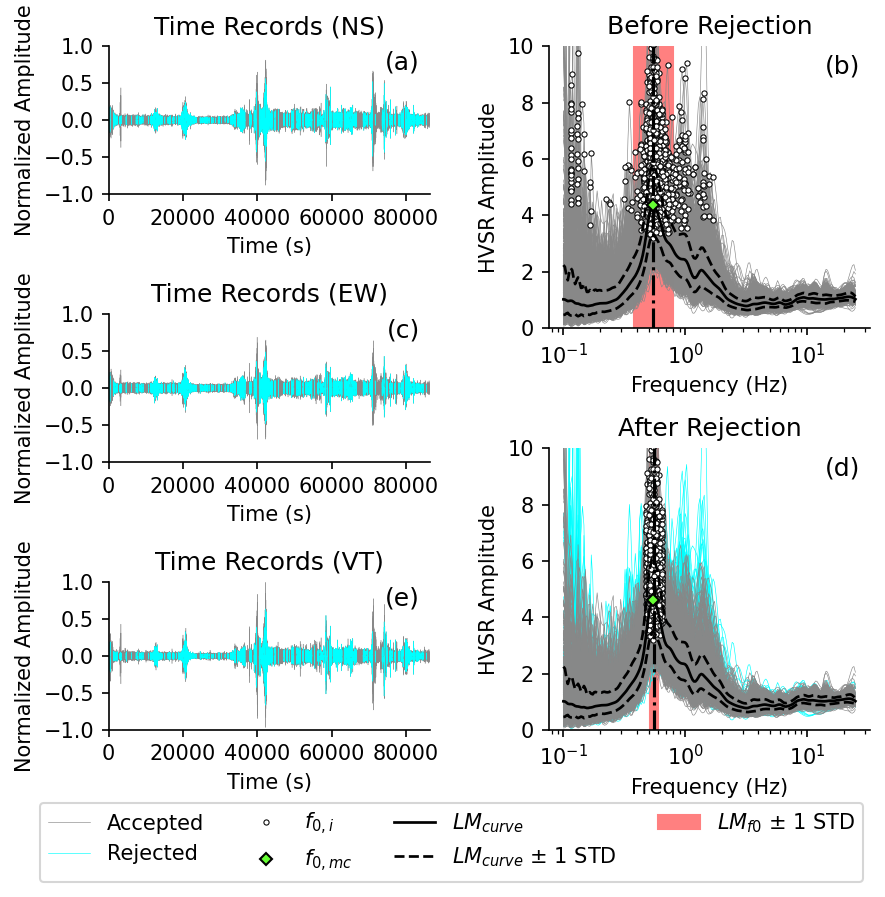

Figure saved successfully!
Results saved successfully!
Results saved successfully!
Working on: Z9.D12.2013-05-03.2013-05-04
Elapsed Time: 0.81 seconds

Statistics before rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              2.68                          1.22
Fundamental Site Period, T0                 0.37                          1.22


Analysis summary:


Window length                                    60s
No. of windows                                  1440
Number of iterations to convergence  3 of 50 allowed
No. of rejected windows                          222


Statistics after rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              4.32                           0.1
Fundamental Site Period, T0                 0.23                           0.1

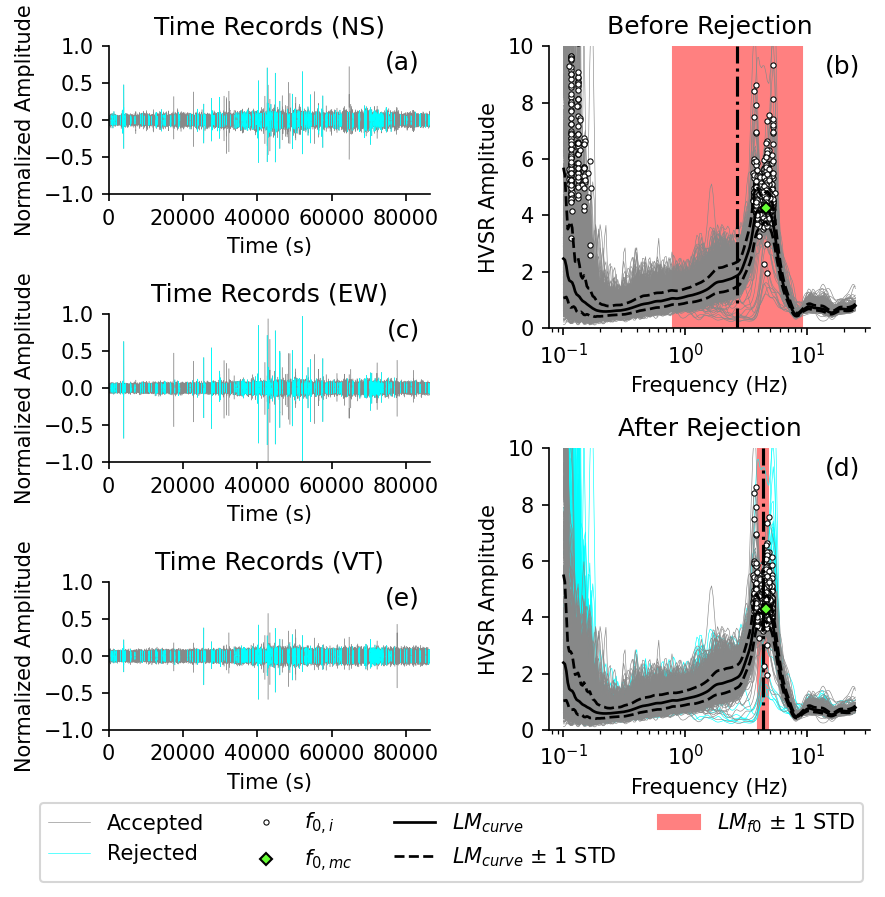

Figure saved successfully!
Results saved successfully!
Results saved successfully!
Working on: Z9.D03.2013-05-04.2013-05-05
Elapsed Time: 0.82 seconds

Statistics before rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              0.49                          1.01
Fundamental Site Period, T0                 2.05                          1.01


Analysis summary:


Window length                                    60s
No. of windows                                  1440
Number of iterations to convergence  3 of 50 allowed
No. of rejected windows                           46


Statistics after rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              0.45                          0.89
Fundamental Site Period, T0                 2.24                          0.89

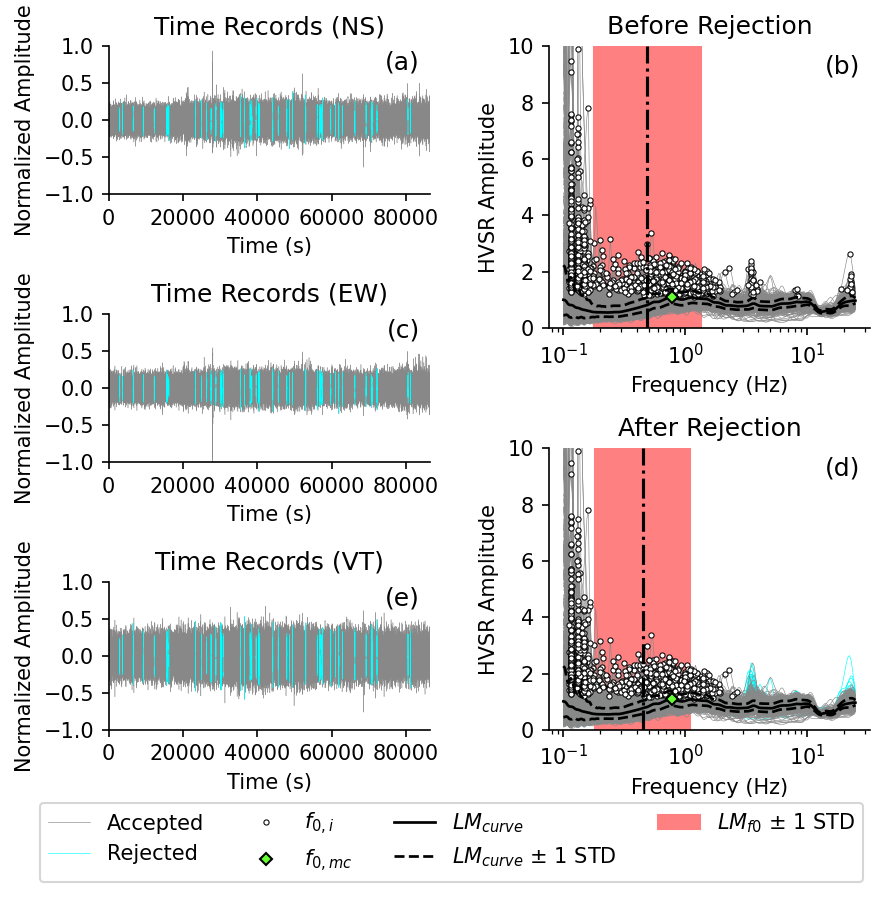

Figure saved successfully!
Results saved successfully!
Results saved successfully!
Working on: Z9.E23.2013-05-06.2013-05-07
Elapsed Time: 0.90 seconds

Statistics before rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              1.14                          1.04
Fundamental Site Period, T0                 0.88                          1.04


Analysis summary:


Window length                                    60s
No. of windows                                  1440
Number of iterations to convergence  6 of 50 allowed
No. of rejected windows                          103


Statistics after rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              0.98                          0.91
Fundamental Site Period, T0                 1.02                          0.91

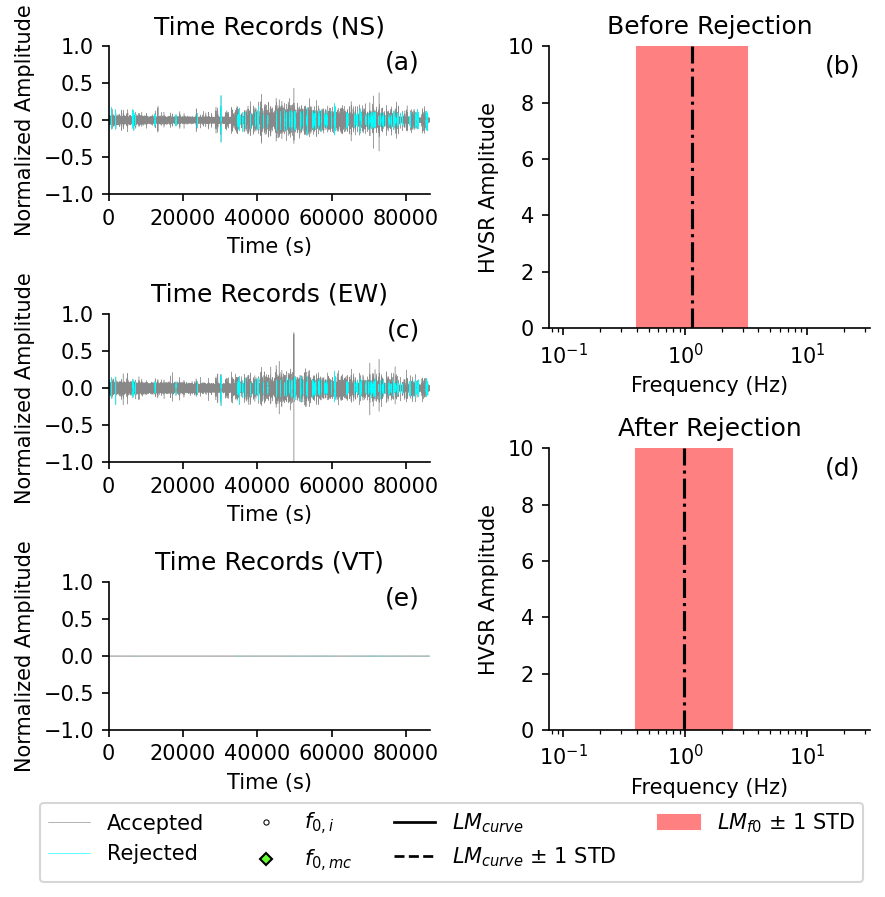

Figure saved successfully!
Results saved successfully!
Results saved successfully!
Working on: Z9.W26.2012-05-16.2012-05-17
Elapsed Time: 0.70 seconds

Statistics before rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              2.09                          0.73
Fundamental Site Period, T0                 0.48                          0.73


Analysis summary:


Window length                                    60s
No. of windows                                  1440
Number of iterations to convergence  8 of 50 allowed
No. of rejected windows                          623


Statistics after rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              2.40                          0.01
Fundamental Site Period, T0                 0.42                          0.01

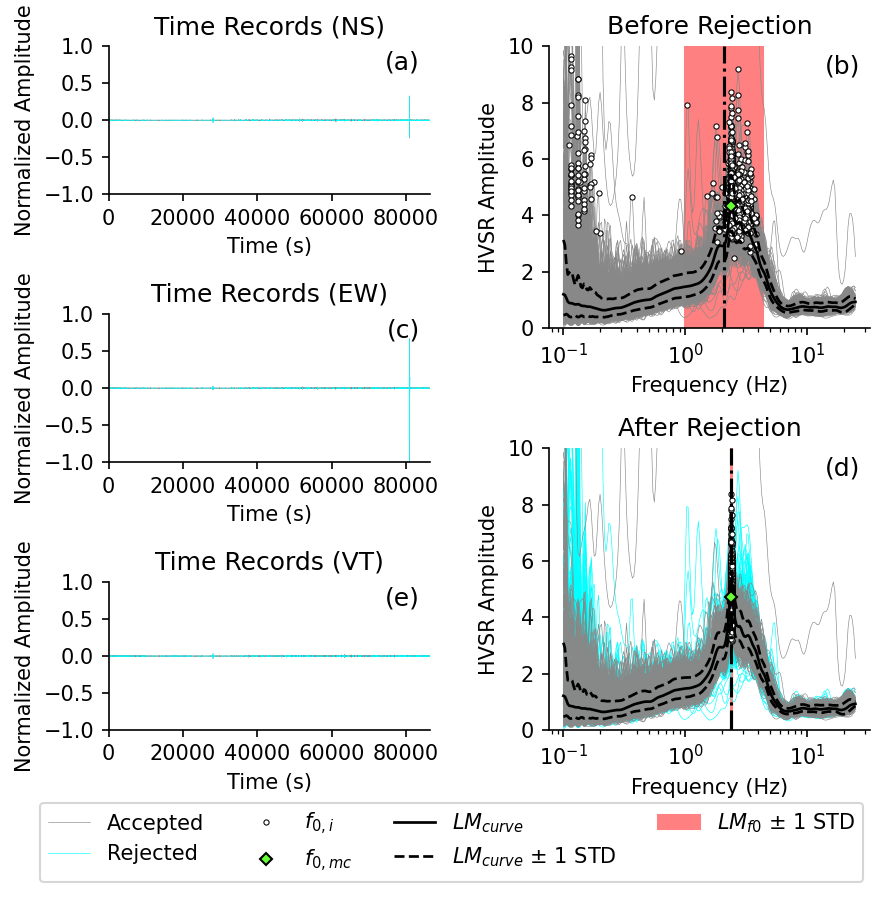

Figure saved successfully!
Results saved successfully!
Results saved successfully!
Working on: Z9.E05.2013-09-15.2013-09-16
Elapsed Time: 0.77 seconds

Statistics before rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              0.78                           0.8
Fundamental Site Period, T0                 1.29                           0.8


Analysis summary:


Window length                                     60s
No. of windows                                   1440
Number of iterations to convergence  10 of 50 allowed
No. of rejected windows                           579


Statistics after rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              0.97                          0.07
Fundamental Site Period, T0                 1.03                          0.07

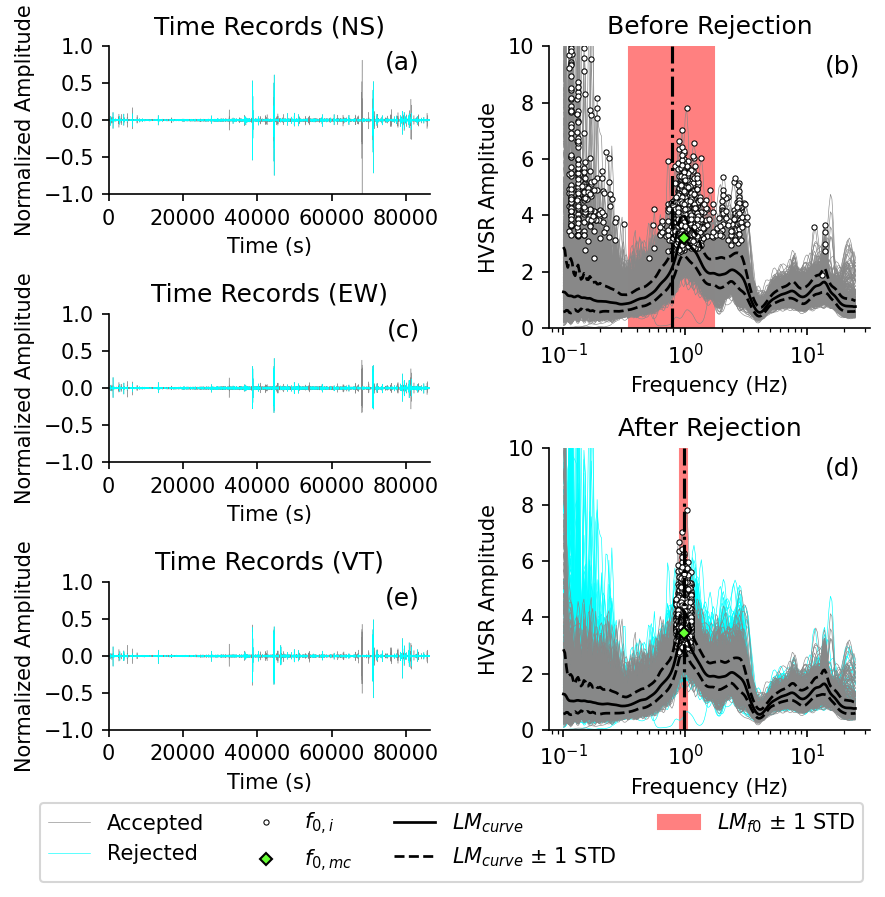

Figure saved successfully!
Results saved successfully!
Results saved successfully!
Working on: Z9.W35.2012-05-16.2012-05-17
Elapsed Time: 1.21 seconds

Statistics before rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              3.73                          1.02
Fundamental Site Period, T0                 0.27                          1.02


Analysis summary:


Window length                                    60s
No. of windows                                  1440
Number of iterations to convergence  8 of 50 allowed
No. of rejected windows                          561


Statistics after rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              4.98                          0.02
Fundamental Site Period, T0                 0.20                          0.02

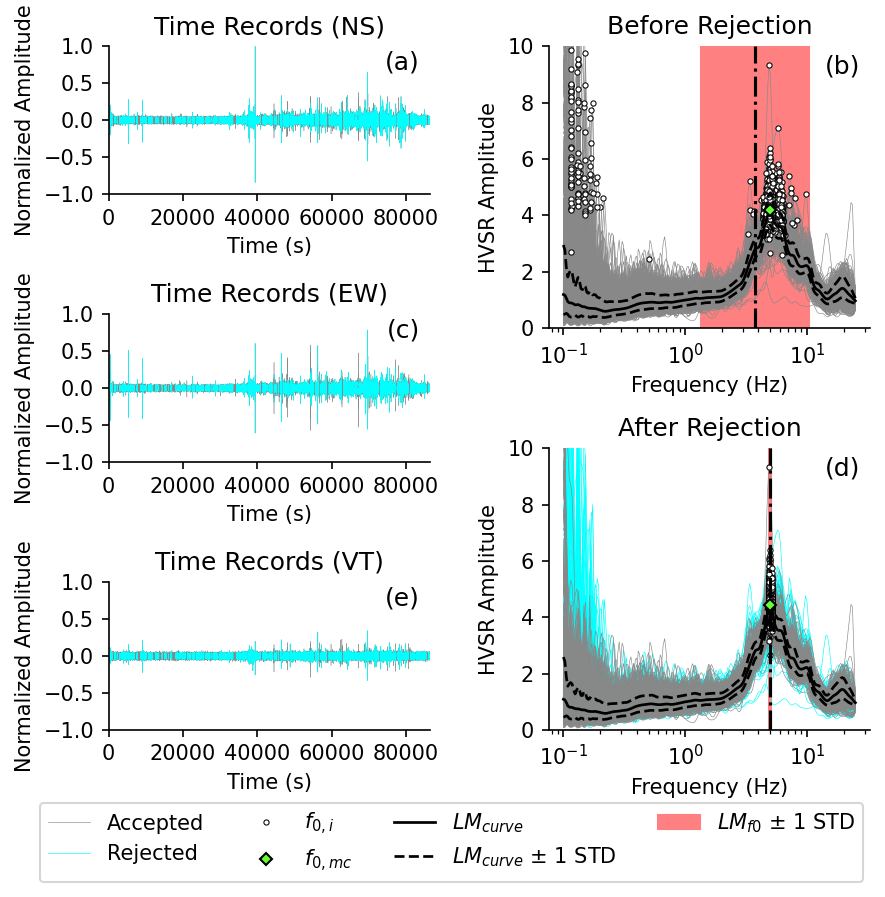

Figure saved successfully!
Results saved successfully!
Results saved successfully!
Working on: Z9.E19.2013-05-06.2013-05-07
Elapsed Time: 0.29 seconds

Statistics before rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              0.34                          0.95
Fundamental Site Period, T0                 2.95                          0.95


Analysis summary:


Window length                                    60s
No. of windows                                   527
Number of iterations to convergence  1 of 50 allowed
No. of rejected windows                            1


Statistics after rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              0.34                          0.94
Fundamental Site Period, T0                 2.97                          0.94

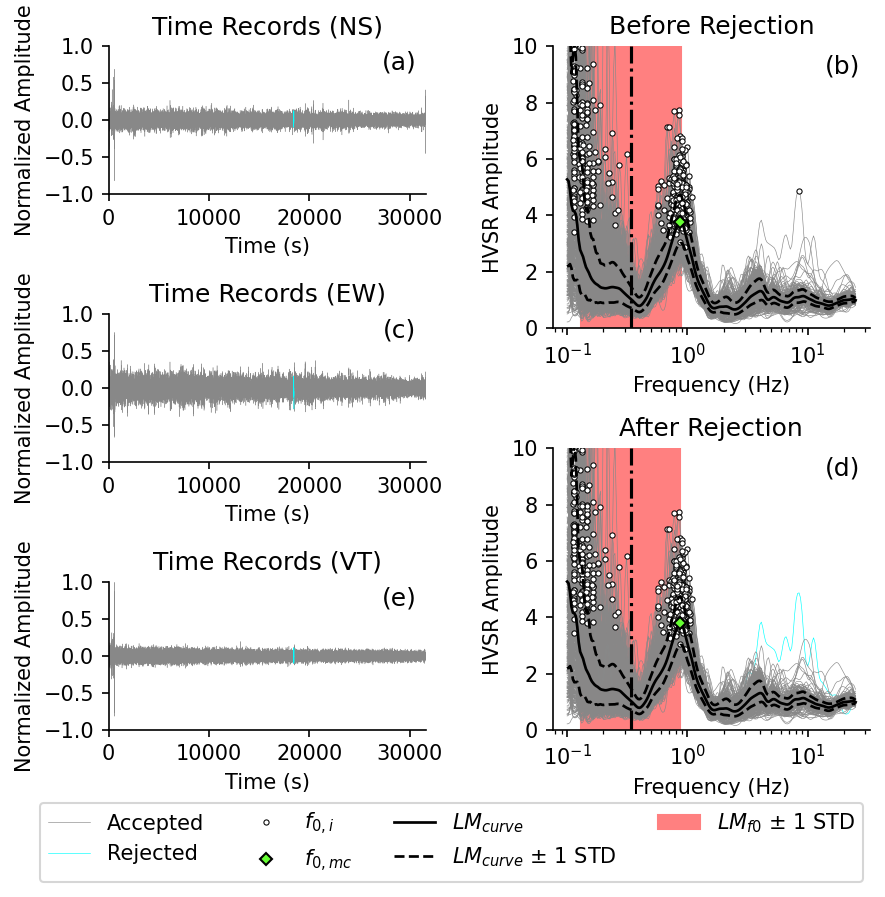

Figure saved successfully!
Results saved successfully!
Results saved successfully!
Working on: Z9.W28.2012-05-09.2012-05-10
Elapsed Time: 0.71 seconds

Statistics before rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              2.02                          1.14
Fundamental Site Period, T0                 0.50                          1.14


Analysis summary:


Window length                                    60s
No. of windows                                  1440
Number of iterations to convergence  7 of 50 allowed
No. of rejected windows                          504


Statistics after rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              3.14                          0.02
Fundamental Site Period, T0                 0.32                          0.02

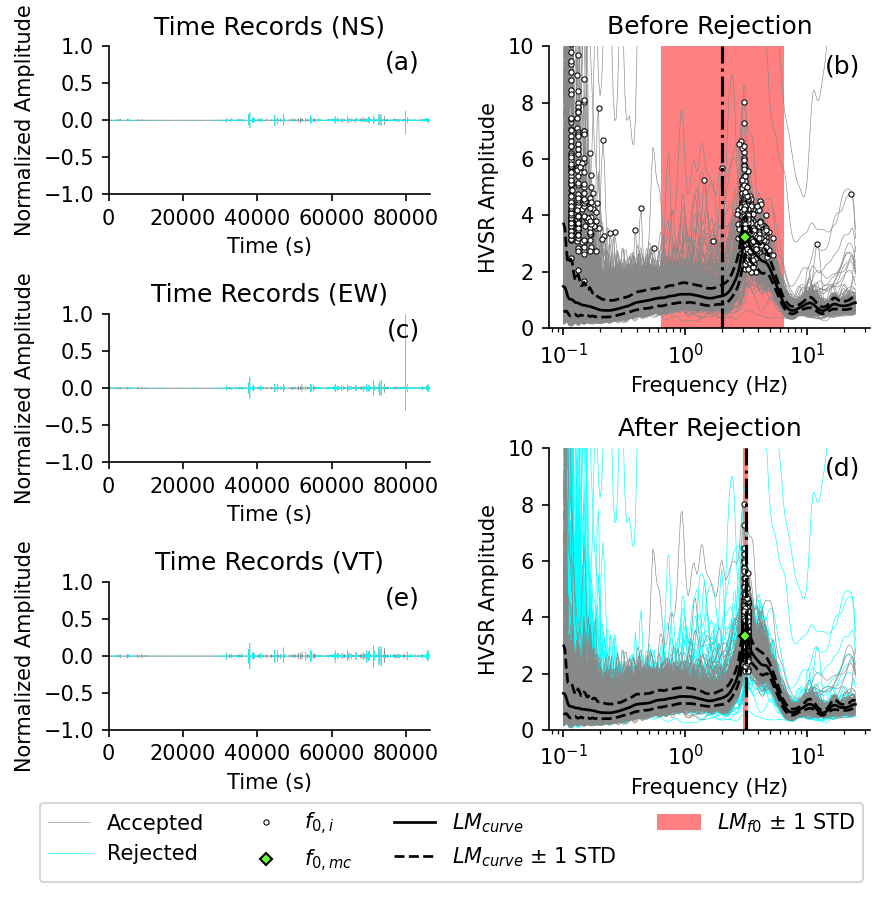

Figure saved successfully!
Results saved successfully!
Results saved successfully!
Working on: Z9.E15.2013-05-09.2013-05-10
Elapsed Time: 0.75 seconds

Statistics before rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              0.67                          0.87
Fundamental Site Period, T0                 1.50                          0.87


Analysis summary:


Window length                                    60s
No. of windows                                  1440
Number of iterations to convergence  9 of 50 allowed
No. of rejected windows                          629


Statistics after rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              1.13                          0.05
Fundamental Site Period, T0                 0.89                          0.05

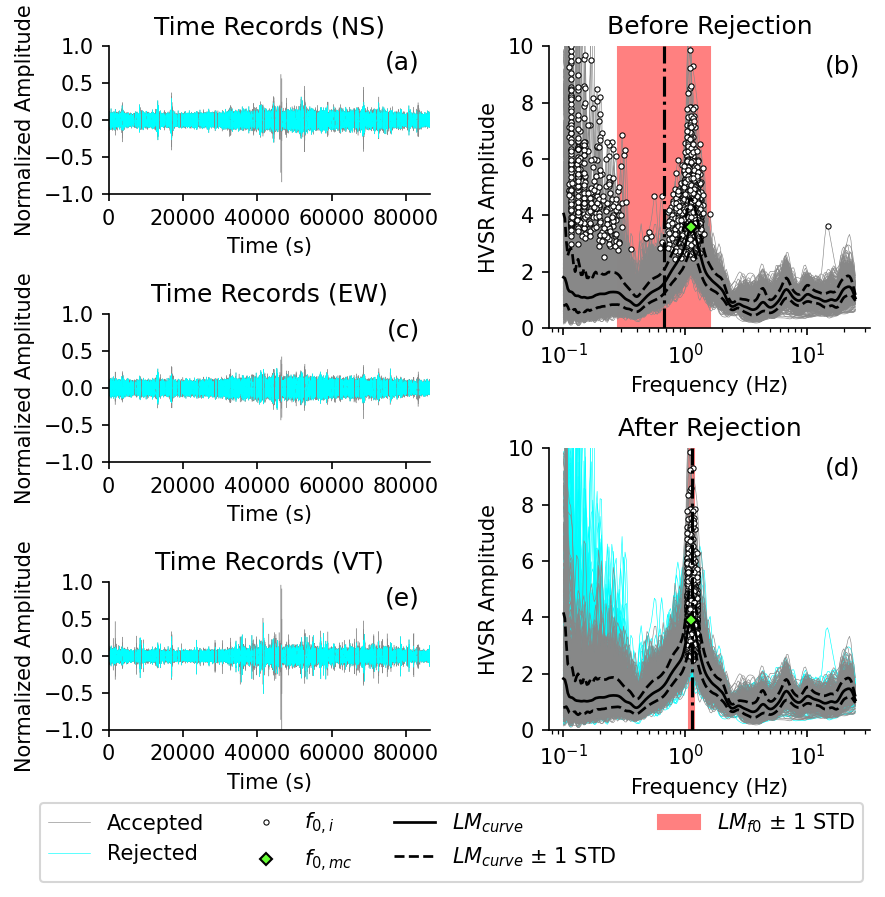

Figure saved successfully!
Results saved successfully!
Results saved successfully!
Working on: Z9.E26.2013-05-06.2013-05-07
Elapsed Time: 0.95 seconds

Statistics before rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              0.40                           0.9
Fundamental Site Period, T0                 2.48                           0.9


Analysis summary:


Window length                                    60s
No. of windows                                  1440
Number of iterations to convergence  1 of 50 allowed
No. of rejected windows                            0


Statistics after rejection:


Lognormal Median  Lognormal Standard Deviation
Fundamental Site Frequency, f0              0.40                           0.9
Fundamental Site Period, T0                 2.48                           0.9

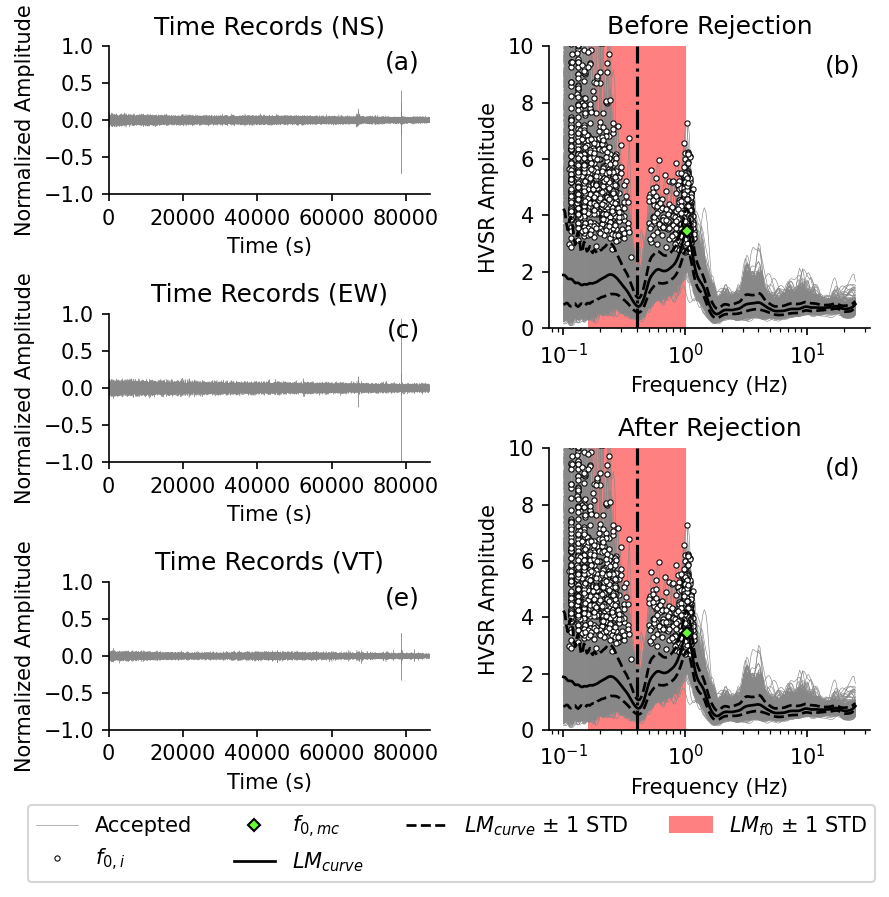

Figure saved successfully!
Results saved successfully!
Results saved successfully!
Working on: Z9.D06.2013-05-04.2013-05-05


ValueError: Missing, duplicate, or incorrectly named components.

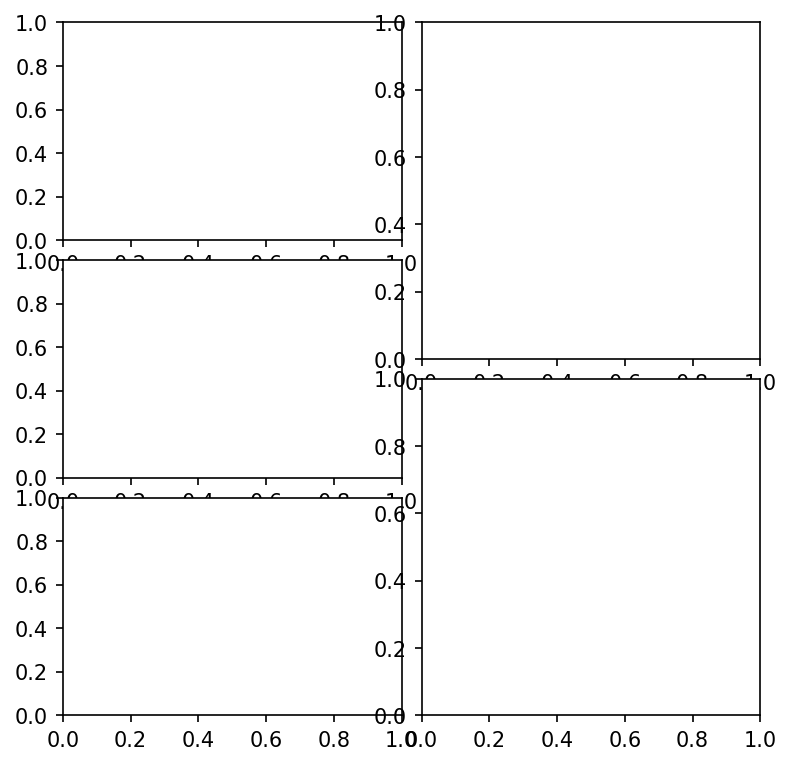

In [91]:

# Generate output directories
fig_out = './results/'+method+'/figures/'
hvsrpy_out = './results/'+method+'/hvsrpy/'
geopsy_out = './results/'+method+'/geopsy/'

if not os.path.exists(fig_out):
    os.makedirs(fig_out)
if not os.path.exists(hvsrpy_out):
    os.makedirs(hvsrpy_out)
if not os.path.exists(geopsy_out):
    os.makedirs(geopsy_out)


# Loop over all mseed files in file_path

pathlist = Path(file_path).glob('**/*.mseed')
for path in pathlist:

    file_name = path #file_path+"Z9.D03.2013-05-04.2013-05-05.mseed"
    station_str = str(path).split('/')[-1].split('.mseed')[0]

    print('Working on: '+station_str)

    # Read sample rate and set fmax resample
    st = read(file_name)
    sr = st[0].stats.sampling_rate
    resample_fmax = sr/2

    fig = plt.figure(figsize=(6,6), dpi=150)
    gs = fig.add_gridspec(nrows=6,ncols=6)

    ax0 = fig.add_subplot(gs[0:2, 0:3])
    ax1 = fig.add_subplot(gs[2:4, 0:3])
    ax2 = fig.add_subplot(gs[4:6, 0:3])

    if rejection_bool:
        ax3 = fig.add_subplot(gs[0:3, 3:6])
        ax4 = fig.add_subplot(gs[3:6, 3:6])
    else:
        ax3 = fig.add_subplot(gs[0:3, 3:6])
        ax4 = False

    start = time.time()
    sensor = hvsrpy.Sensor3c.from_mseed(file_name)
    bp_filter = {"flag":filter_bool, "flow":filter_flow, "fhigh":filter_fhigh, "order":filter_order}
    resampling = {"minf":resample_fmin, "maxf":resample_fmax, "nf":resample_fnum, "res_type":resample_type}
    hv = sensor.hv(windowlength, bp_filter, width, bandwidth, resampling, method, f_low=peak_f_lower, f_high=peak_f_upper, azimuth=azimuth)
    end = time.time()
    print(f"Elapsed Time: {str(end-start)[0:4]} seconds")

    individual_width = 0.3
    median_width = 1.3
    for ax, title in zip([ax3, ax4], ["Before Rejection", "After Rejection"]):
        # Rejected Windows
        if title=="After Rejection":
            if len(hv.rejected_window_indices):
                label = "Rejected"
                for amp in hv.amp[hv.rejected_window_indices]:
                    ax.plot(hv.frq, amp, color='#00ffff', linewidth=individual_width, zorder=2, label=label)
                    label=None
                
        # Accepted Windows
        label="Accepted"
        for amp in hv.amp[hv.valid_window_indices]:
            ax.plot(hv.frq, amp, color='#888888', linewidth=individual_width,
                    label = label if title=="Before Rejection" else "")
            label=None
        
        # Window Peaks
        ax.plot(hv.peak_frq, hv.peak_amp, linestyle="", zorder=2,
                marker='o', markersize=2.5, markerfacecolor="#ffffff", markeredgewidth=0.5, markeredgecolor='k',
                label="" if title=="Before Rejection" and rejection_bool else r"$f_{0,i}$")
        
        # Peak Mean Curve
        ax.plot(hv.mc_peak_frq(distribution_mc), hv.mc_peak_amp(distribution_mc), linestyle="", zorder=4,
                marker='D', markersize=4, markerfacecolor='#66ff33', markeredgewidth=1, markeredgecolor='k', 
                label = "" if title=="Before Rejection" and rejection_bool else r"$f_{0,mc}$")
        
        # Mean Curve
        label = r"$LM_{curve}$" if distribution_mc=="lognormal" else "Mean"   
        ax.plot(hv.frq, hv.mean_curve(distribution_mc), color='k', linewidth=median_width,
                label="" if title=="Before Rejection" and rejection_bool else label)
        
        # Mean +/- Curve
        label = r"$LM_{curve}$"+" ± 1 STD" if distribution_mc=="lognormal" else "Mean ± 1 STD"
        ax.plot(hv.frq, hv.nstd_curve(-1, distribution_mc),
                color='k', linestyle='--', linewidth=median_width, zorder=3,
                label = "" if title=="Before Rejection" and rejection_bool else label)
        ax.plot(hv.frq, hv.nstd_curve(+1, distribution_mc),
                color='k', linestyle='--', linewidth=median_width, zorder=3)

        # f0 +/- STD
        if ymin is not None and ymax is not None:
            ax.set_ylim((ymin, ymax))
        label = r"$LM_{f0}$"+" ± 1 STD" if distribution_f0=="lognormal" else "Mean f0 ± 1 STD"    
        _ymin, _ymax = ax.get_ylim()
        ax.plot([hv.mean_f0_frq(distribution_f0)]*2, [_ymin, _ymax], linestyle="-.", color="#000000")
        ax.fill([hv.nstd_f0_frq(-1, distribution_f0)]*2 + [hv.nstd_f0_frq(+1, distribution_f0)]*2, [_ymin, _ymax, _ymax, _ymin], 
                color = "#ff8080",
                label="" if title=="Before Rejection" and rejection_bool else label)
        ax.set_ylim((_ymin, _ymax))
        
        ax.set_xscale('log')
        ax.set_xlabel("Frequency (Hz)")
        ax.set_ylabel("HVSR Amplitude")
        if rejection_bool:
            if title=="Before Rejection":
                print("\nStatistics before rejection:")
                hv.print_stats(distribution_f0)
                c_iter = hv.reject_windows(n, max_iterations=max_iterations, 
                                        distribution_f0=distribution_f0, distribution_mc=distribution_mc)
            elif title=="After Rejection":
                fig.legend(ncol=4, loc='lower center', bbox_to_anchor=(0.51, 0), columnspacing=2)

                print("\nAnalysis summary:")  
                display(pd.DataFrame(columns=[""], index=["Window length", "No. of windows", "Number of iterations to convergence", "No. of rejected windows"], 
                        data=[f"{windowlength}s", str(sensor.ns.nseries), f"{c_iter} of {max_iterations} allowed", str(sum(hv.rejected_window_indices))]))            
                print("\nStatistics after rejection:")
                hv.print_stats(distribution_f0)
        else:
            display(pd.DataFrame(columns=[""], index=["Window length", "No. of windows"], 
                            data=[f"{windowlength}s", str(sensor.ns.nseries)]))
            hv.print_stats(distribution_f0)
            fig.legend(loc="upper center", bbox_to_anchor=(0.77, 0.4))
            break
        ax.set_title(title)

    norm_factor = sensor.normalization_factor
    for ax, timerecord, name in zip([ax0,ax1,ax2], [sensor.ns, sensor.ew, sensor.vt], ["NS", "EW", "VT"]):
        ctime = timerecord.time
        amp = timerecord.amp/norm_factor
        ax.plot(ctime.T, amp.T, linewidth=0.2, color='#888888')
        ax.set_title(f"Time Records ({name})")
        ax.set_yticks([-1, -0.5, 0, 0.5, 1])
        ax.set_xlim(0, windowlength*timerecord.nseries)
        ax.set_ylim(-1, 1)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Normalized Amplitude')
        ax.plot(ctime[hv.rejected_window_indices].T, amp[hv.rejected_window_indices].T, linewidth=0.2, color="cyan")

    if rejection_bool:
        axs = [ax0, ax3, ax1, ax4, ax2]
    else:
        axs = [ax0, ax3, ax1, ax2]
        
    for ax, letter in zip(axs, list("abcde")):    
        ax.text(0.97, 0.97, f"({letter})", ha="right", va="top", transform=ax.transAxes, fontsize=12)
        for spine in ["top", "right"]:
            ax.spines[spine].set_visible(False)


    fig.tight_layout(h_pad=1, w_pad=2, rect=(0,0.08,1,1))
    plt.show()

    ###################### Save figure ###################### 

    figure_name_out = fig_out+"/"+station_str+"_hvsr_figure.png"

    fig.savefig(figure_name_out, dpi=300, bbox_inches='tight')
    plt.close()
    print("Figure saved successfully!")


    ###################### Save results text file ###################### 

    file_name_out_hvsrpy = hvsrpy_out+"/"+station_str+"_output_hvsrpy.hv"

    hv.to_file(file_name_out_hvsrpy, distribution_f0, distribution_mc, data_format="hvsrpy")
    print("Results saved successfully!")


    ###################### Save Geopsy text file ######################
    
    file_name_out_geopsy = geopsy_out+"/"+station_str+"_output_geopsy.hv"

    hv.to_file(file_name_out_geopsy, distribution_f0, distribution_mc, data_format="geopsy")
    print("Results saved successfully!")


## SESAME (2004) Reliability and Clarity Criteria
---

Please note that this functionality is still in the beta stage of development.
So please review the classification carefully before incorporating the results into your work.
If you believe you have found an error or if you wish to provide other feedback related to this functionality it is both welcomed and appreciated.

In [ ]:
reliability = utils.sesame_reliability(hv.meta["Window Length"], len(hv.valid_window_indices), hv.frq, hv.mean_curve(), hv.std_curve(), search_limits=(peak_f_lower, peak_f_upper), verbose=1)
clarity = utils.sesame_clarity(hv.frq, hv.mean_curve(), hv.std_curve(), hv.std_f0_frq(distribution="normal"), search_limits=(peak_f_lower, peak_f_upper), verbose=1)

Assessing SESAME (2004) reliability criteria ... 
  Criteria i): Pass
  Criteria ii): Pass
  Criteria iii): Pass
  The chosen peak PASSES the peak reliability criteria, with 3 of 3.
Assessing SESAME (2004) clarity criteria ... 
  Criteria i): Pass
  Criteria ii): Pass
  Criteria iii): Pass
  Criteria iv): Pass
  Criteria v): Pass
  Criteria vi): Pass
  The chosen peak PASSES the peak clarity criteria, with 6 of 6.


## Save Figure to File
---

In [ ]:
figure_name_out = "example_hvsr_figure.png"

fig.savefig(figure_name_out, dpi=300, bbox_inches='tight')
plt.close()
print("Figure saved successfully!")

Figure saved successfully!


## Save Results to Text File
---

In [ ]:
file_name_out = "example_output_hvsrpy.hv"

hv.to_file(file_name_out, distribution_f0, distribution_mc, data_format="hvsrpy")
print("Results saved successfully!")

Results saved successfully!


## Save Results to Geopsy-Style Text File
---

In [ ]:
file_name_out = "example_output_geopsy.hv"

hv.to_file(file_name_out, distribution_f0, distribution_mc, data_format="geopsy")
print("Results saved successfully!")

Results saved successfully!
